In [5]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("./../data/heart_2022_cleaned.csv")
df.head(5)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HadDiabetes_binary,BMI_category,CovidPos_binary
0,Alabama,Female,4,0.0,0.0,1,0,8.0,0,0,0,0,0,0,0,0,0,0,Yes,0,0,0,0,0,0,0,1,0,"White only, Non-Hispanic",Age 80 or older,1.70,80.74,27.44,0,0,1,0,"Yes, received tetanus shot but not sure what type",0,No,1,Overweight,0
1,Alabama,Female,5,0.0,0.0,1,0,6.0,0,0,0,0,0,1,0,0,0,0,No,0,0,0,0,0,0,0,0,0,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,0,0,0,0,"No, did not receive any tetanus shot in the pa...",0,No,0,Overweight,0
2,Alabama,Female,4,2.0,3.0,1,1,5.0,0,0,0,0,0,1,0,0,0,0,No,0,0,0,0,0,0,0,0,0,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,0,0,0,0,"No, did not receive any tetanus shot in the pa...",0,Yes,0,Overweight,1
3,Alabama,Female,5,0.0,0.0,1,1,7.0,0,0,0,0,1,0,0,0,0,1,No,0,0,0,0,0,0,2,0,1,"White only, Non-Hispanic",Age 65 to 69,1.65,63.50,23.30,0,0,1,1,"No, did not receive any tetanus shot in the pa...",0,No,0,Normal,0
4,Alabama,Female,2,2.0,0.0,1,1,9.0,0,0,0,0,0,0,0,0,0,0,No,0,0,0,0,0,0,0,0,1,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,1,0,0,1,"No, did not receive any tetanus shot in the pa...",0,No,0,Normal,0


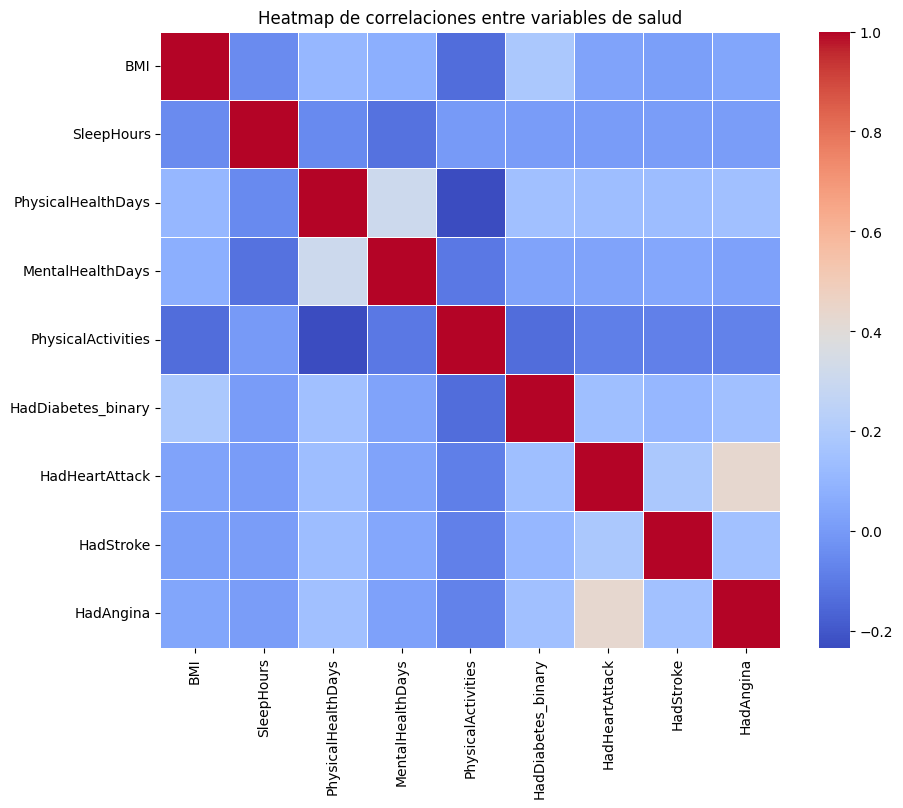

In [7]:
cols = [
    "BMI",
    "SleepHours",
    "PhysicalHealthDays",
    "MentalHealthDays",
    "PhysicalActivities",
    "HadDiabetes_binary",
    "HadHeartAttack",
    "HadStroke",
    "HadAngina"
]

df_sel = df[cols].dropna()

corr = df_sel.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=False,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Heatmap de correlaciones entre variables de salud")
plt.show()

## NOTAS
Aquí podemos ver las variables que van más relacionadas y por ende las que más sentido tiene comparar. Ignoramos los "1.00" porque son la misma variable.

Que podemos observar:

- Los problemas cardiovasculares en general van bastate relacionados con los ataques al corazón (en especial la angina de pecho).

- La diabetes por su lado también se relaciona con los ataques al corazón.

- Un IMC elevado (sobrepeso u obesidad) se ve más relacionado con mayores problemas de salud física y sobretodo con la presencia de diabetes.

- A su vez, los días de mala salud física y mental se ven bastante relacionados.

#### Conclusión
Este gráfico nos permite relacionar las variables más importantes, observando las que se ven más relacionadas claramente entre sí.

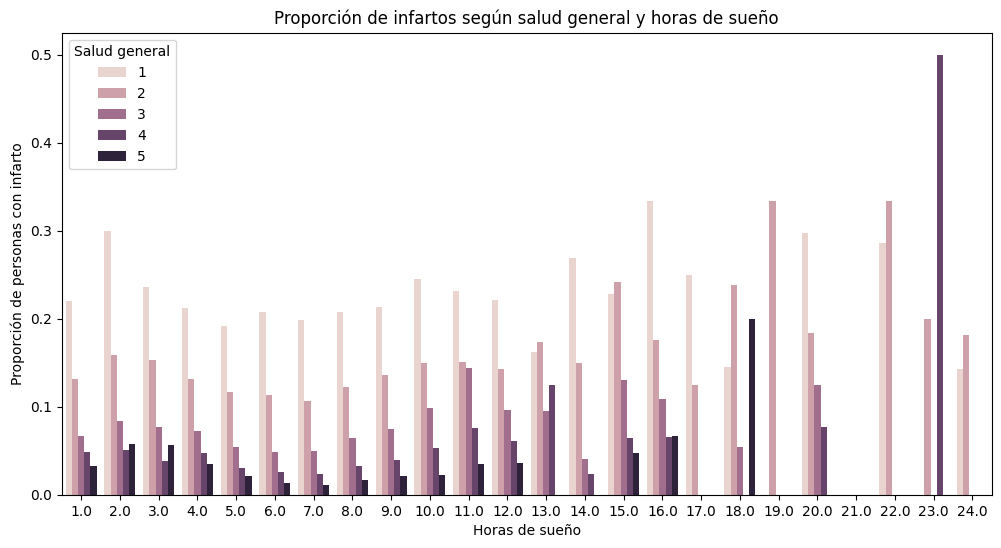

In [8]:
patron1 = (
    df.groupby(["GeneralHealth", "SleepHours"])["HadHeartAttack"]
    .mean()
    .reset_index()
)

patron1.head()

plt.figure(figsize=(12, 6))

sns.barplot(
    data=patron1,
    x="SleepHours",
    y="HadHeartAttack",
    hue="GeneralHealth"
)

plt.title("Proporción de infartos según salud general y horas de sueño")
plt.ylabel("Proporción de personas con infarto")
plt.xlabel("Horas de sueño")
plt.legend(title="Salud general")
plt.show()

## NOTAS
En este gráfico observamos las siguientes conclusiones:

- Existe una relación clara entre la salud general y la proporción de infartos: a peor salud general (niveles más bajos en la escala), mayor es la proporción de personas que han sufrido un infarto, independientemente de las horas de sueño.

- Las horas de sueño extremas se asocian con mayor riesgo: dormir muy pocas horas (4 o menos) o demasiadas (9 o más) tiende a mostrar proporciones más altas de infarto frente a dormir un número intermedio de horas.

- Dormir entre 6 y 8 horas parece estar asociado con menores proporciones de infarto, especialmente en personas con mejor salud general.

- El sueño no actúa de forma aislada: incluso con horas de sueño “adecuadas”, una mala salud general mantiene un riesgo relativamente alto.

#### Conclusión
En resumen, el gráfico refuerza que una buena salud general y un patrón de sueño moderado se asocian con menor proporción de infartos, mientras que la mala salud y los extremos de sueño aumentan el riesgo.


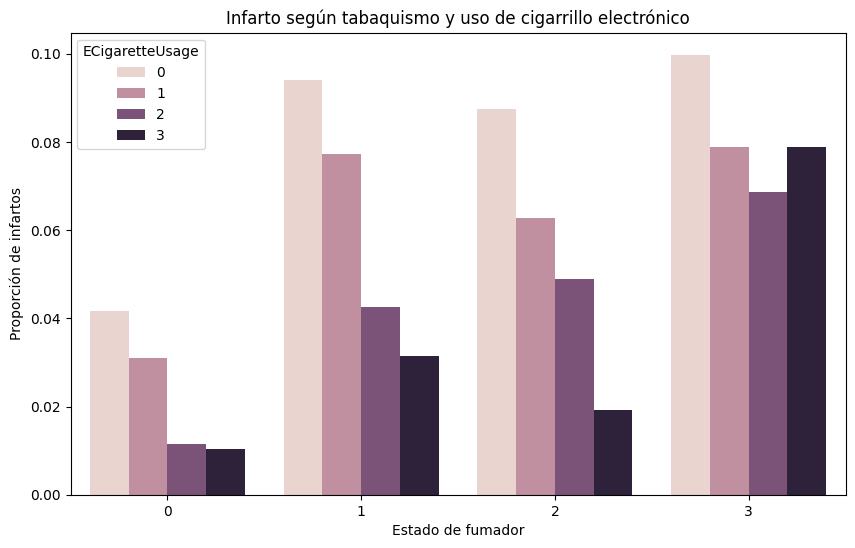

In [9]:
patron2 = (
    df.groupby(["SmokerStatus", "ECigaretteUsage"])["HadHeartAttack"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=patron2,
    x="SmokerStatus",
    y="HadHeartAttack",
    hue="ECigaretteUsage"
)

plt.title("Infarto según tabaquismo y uso de cigarrillo electrónico")
plt.ylabel("Proporción de infartos")
plt.xlabel("Estado de fumador")
plt.show()

## Notas
En este caso, el gráfico nos presenta las siguientes conclusiones:

- Fumar se asocia con una mayor proporción de infartos: a medida que el estado de fumador aumenta (de no fumador a fumador más intenso), la proporción de infartos crece de manera clara.

- El uso de cigarrillo electrónico no elimina el riesgo: incluso entre quienes usan cigarrillo electrónico, la proporción de infartos sigue siendo relevante, especialmente en fumadores.

- La combinación de tabaquismo y uso de e-cigarrillo muestra los valores más altos: los fumadores que además usan cigarrillo electrónico presentan las mayores proporciones de infarto.

- No fumadores y no usuarios de e-cigarrillo presentan el menor riesgo, lo que refuerza el efecto negativo del consumo de nicotina sobre la salud cardiovascular.

#### Conclusión
En conjunto, el gráfico sugiere que tanto el tabaquismo tradicional como el uso de cigarrillos electrónicos están asociados con un mayor riesgo de infarto, y que combinarlos puede agravar aún más dicho riesgo.


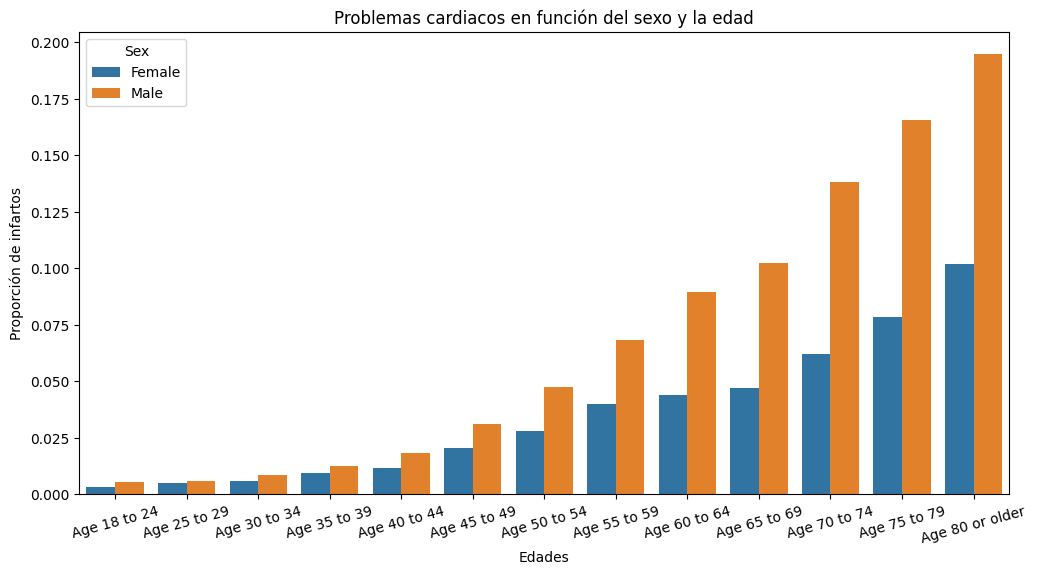

In [10]:
# HIPÓTESIS 2

patron3 = (
    df.groupby(["Sex", "AgeCategory"])["HadHeartAttack"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=patron3,
    x="AgeCategory",
    y="HadHeartAttack",
    hue="Sex"
)

plt.title("Problemas cardiacos en función del sexo y la edad")
plt.ylabel("Proporción de infartos")
plt.xlabel("Edades")
plt.xticks(rotation=15)
plt.show()

## Notas
De forma breve, este gráfico permite extraer estas conclusiones:

- La proporción de infartos aumenta claramente con la edad en ambos sexos, siendo muy baja en edades jóvenes y creciendo de forma progresiva a partir de los 45–50 años.

- Los hombres presentan una mayor proporción de infartos que las mujeres en todos los grupos de edad, y la diferencia se hace más marcada a partir de la mediana edad.

- En edades avanzadas (70 años o más) el riesgo aumenta de manera notable en ambos sexos, aunque sigue siendo más alto en hombres.

- Las mujeres muestran un incremento más tardío, lo que sugiere un posible efecto protector en edades más jóvenes.

#### Conclusión
Dicho esto, el gráfico indica que la edad es un factor de riesgo clave para los infartos, y que el sexo masculino presenta un riesgo sistemáticamente mayor, especialmente en edades avanzadas.